In [5]:
%load_ext autoreload
%autoreload 2

import math
import cmath
import numpy as np
import scipy
import sympy
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib import colors as m2colors
import seaborn as sns
from pylab import cm
import plotly
import plotly.graph_objects as go

import json
import os
import sys
import re

from MMfxns import *
from MMplotting import *
from pyDOE2 import lhs

cwd = os.getcwd()
sns.set(style="ticks", font_scale=1.5)

mcolors = dict(m2colors.BASE_COLORS, **m2colors.CSS4_COLORS)

saveall = True

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

pd.set_option('display.expand_frame_repr', False, 'display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


{'tau_F': 12.0, 'tau_SG': 300.0, 'tau_SR': 300.0, 'kc': 1.5, 'km': 'stiff', 'm0': 6.5, 'x0': 1.9, 'a0': 1.0, 'xtt': 0.0, 'g': 35, 'n': 6.0, 'a_max': 10, 'resolution': 1.0, 'color': None, 'input_m': [], 'tau_R0': 150, 'TV0SR': 1.9, 'TV0SG': 1.9, 'dynamics': 'updated_exp', 'eps': (0.0, 1.0, 0.0), 'res': 150}
--------
a_c = 1.508742, x_c = 0.945465, m_c in absolute = 3.621481
updated_exp


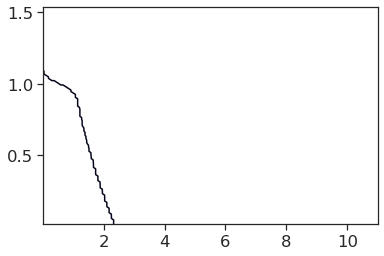

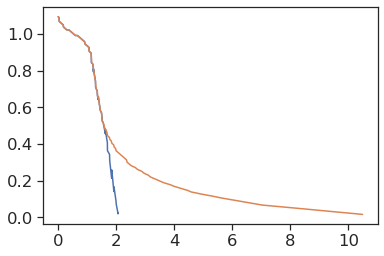

assuming stiff
summary
counts [ 24  72 360]
456
ids [1 2 1]
priming times [72.15824175824176]
priming check 72.15824175824176
memory times [0.]
memory check 0.0
mechanical ratios [1.23076923]
218.242652090252 238.49934613356382 300.0
0      1
1      1
2      1
3      1
4      1
      ..
451    1
452    1
453    1
454    1
455    1
Name: active_region, Length: 456, dtype: int64


In [58]:
#### Energy dependent alpha increase and decrease

resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
#         params['tau'] = .98
        params['tau_F'] = 12. # params['tau'] * 2
        params['tau_SG'] = 300. #params['tau'] * 150
        params['tau_SR'] = params['tau_SG']
        
        params['kc'] = 1.5 # '-stiff' # 0.98 # 'linear' # 0.5 #'soft' 1.
        params['km'] = 'stiff'      
        params['m0'] = 6.5
        params['x0'] = 1.9; 
        params['a0'] = 1.; params['xtt'] = 0.
        params['g'] = 35
        params['n'] = 6.
        
        params['a_max'] = 10
        
        params['resolution'] = 1.
#         params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []
        
        params['tau_R0'] = 150 # params['tau_SG'] #* 2
#         params['TV0SR'] = 1.
#         params['TV0SG'] = 8.
        params['TV0SR'] = params['x0']
        params['TV0SG'] = params['x0']
        
        params['dynamics'] = 'updated_exp' # 'exp_dynamicTS'
        params['eps'] = (0., 1., 0.0) # mean, std, magnitude
        
        params['res'] = 150
    
    return params

ins = np.array(
    [
        [24, 2.],
        [72, 10.],
        [360, 2.],
    ]
        )

params = set_params()
# params = set_params('./figures/figure4_dynamics_profiles/perm_mem_v2.png.json')
# ins = np.array(params['input_m'][0])
print(params)
resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)
mech_stats = np.abs(stiffP - stiffA) / params['m0']
params['a_c'] = params['a_c'].tolist()
print(np.amin(resultsDF['tSG']), np.mean(resultsDF['tSG']), np.amax(resultsDF['tSG']))
print(resultsDF['active_region'])


timesteps per region: [ 24  72 360]
regions: [1 2 1]
24.052747252747253
['#f5793aff', '#1e88e5ff', '#0f2080ff']
profiles_updated_exp_no_mem.png


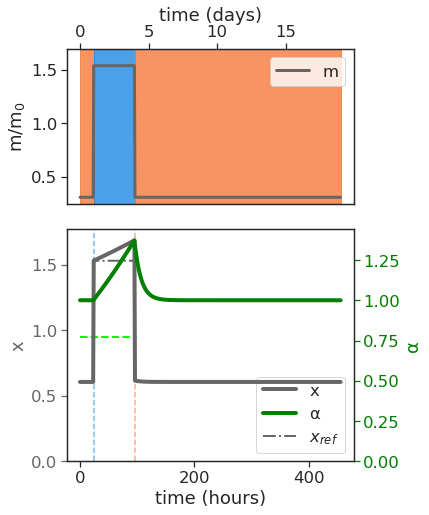

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(6.3,7.5), gridspec_kw={'height_ratios': [1., 1.5]})
# fig.suptitle('Energy Dependent \u03b1')

if resultsDF['active_region'].values[-1] == 2:
#     print('blue')
    params['color'] = (0., 0., 1.)
    fname1 = 'profiles_' + params['dynamics'] + "_perm_mem.png"
#     params['color'] = (212/255, 0., 0.)
elif 3 in pd.unique(resultsDF['active_region']):
#     print('red')
    params['color'] = (212/255, 0., 0.)
    fname1 = 'profiles_' + params['dynamics'] + "_temp_mem.png"
else:
#     print('pink')
    params['color'] = (1., 0., 1.)
    
    params['color'] = (102./255, 102./255, 102./255)
    fname1 = 'profiles_' + params['dynamics'] + "_no_mem.png"

params, fig, axs = plot_profile(fig, ax, resultsDF, params, colors=['#f5793aff', '#1e88e5ff', '#0f2080ff'] )

# colors =  [mcolors['darkorange'], mcolors['red'], mcolors['navy'], mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']]
#  fig2,
params['input_m'].append(ins.tolist())

base_params = set_params()
base_params['input_m'].append(ins.tolist())

saveall = True
if saveall:
    direc = os.getcwd() + '/../figures_v3/figure4/'

#     fname1 = 'profiles_' + params['dynamics'] + "_perm_mem.png"
    print(fname1)
    fig.tight_layout()
    fig.savefig(direc + fname1, format='png', dpi=600, transparent=True)
    
#     fname2 = 'PD_' + fname1
#     print(fname2)
#     fig2.savefig(direc + fname2, format='png', dpi=600)
#     params['eps'] = base_params['eps']
#     print([type(params[i]) for i in params.keys()])
    with open(direc+fname1 + '.json', 'w') as f:
        f.write(json.dumps(base_params))

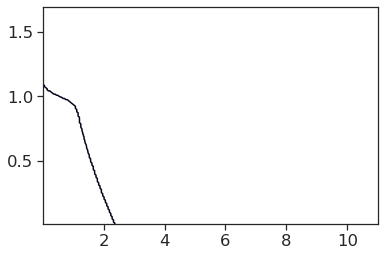

In [64]:
# params = {}
# params = set_params()

x_space = np.linspace(0, 8., res)
a_space = np.linspace(0.01, 5., res)
params['x_c'] = x_crit(params['n'])
m_space = np.linspace(0.05, 11., res)
params['m_space'] = m_space
params['res'] = 250

U_data, U_mins, x_arr_max, gmin_overm, b1_overm, b2_overm, inf_overm, capture2minima, capture_mvals, capmax, barrier_heights = collect_minima(U, m_space, x_space, a_space, params)
mtst2, x_cvals, newlowlines, newhighlines = calc_PD_rates(params)

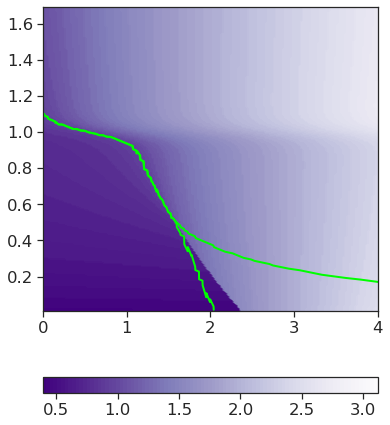

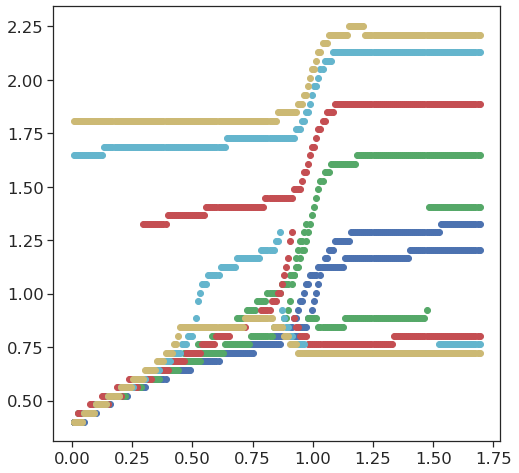

/mnt/b/research/mechanical-memory/cell-mech-memory/../figures_v3/figure4/x_global_min_overlay_phasediagram_values_v1.png


In [74]:
#### figure 4 heat map of equilibrium value of x




# res = 200


# # ac_ind = np.where(np.abs(a_space - a_c) == np.amin(np.abs(a_space-a_c)))[0]

# a_c = alpha_crit(m_space, params)
# m_c = scipy.optimize.fsolve(m_crit_general, 1.5, args=(params), xtol=1e-10)[0] / params['m0']
# params['a_c'] = a_c.tolist(); params['m_c'] = m_c

# # x_space = np.linspace(0, 5., res)
# # m_space = np.linspace(0.05,params['m_c']*3,res) * params['m0']
# # a_space = np.linspace(0.01, params['a_c']*3, res)
# # print(np.amax(m_space))
# a_ind = np.where(np.abs(a_space - a_c) == np.amin(np.abs(a_space - a_c)))[0]

# U_data = np.zeros((len(x_space), len(a_space), len(m_space)))
# for mi, mm in enumerate(m_space):
#     for ai, aa in enumerate(a_space):
#         for xi, xx in enumerate(x_space):
#             U_data[xi, ai, mi] = U(f_m, mm, xx, aa, params)

# x_arr_max = np.zeros((res,res))
# x_arr_min = np.zeros((res,res))
# m0coords = []; m1coords = []; m2coords = []
# for mi, mm in enumerate(m_space):
#     for ai, aa in enumerate(a_space):
#         xargs = find_peaks(-np.abs(np.diff(U_data[:,ai,mi])))[0]
#         Utest = U_data[xargs,ai,mi]        
#         xmins = x_space[xargs]
        
#         if len(xmins) > 0:
#             x_arr_max[mi, ai] = xmins[np.argmin(Utest)]
#             x_arr_min[mi, ai] = np.amin(xmins) # xmins[np.argmin(Utest)]
#         else:
#             try:
#                 x_arr_max[mi, ai] = np.amax(xmins)
# #                 x_arr_min[mi, ai] = np.amin(xmins)
#             except:
#                 x_arr_max[mi, ai] = 0.
# #                 x_arr_min[mi, ai] = 0.

fig, ax = plt.subplots(1,1, figsize=(6,8))

## absolute m
# cf = ax.contourf(a_space, m_space, x_arr, levels=100, cmap=cm.Purples_r)
# ylims = ax.get_ylim()
# ax.plot([params['a_c'], params['a_c']],[np.amin(m_space), params['m_c']*params['m0']*2], mcolors['green'], linewidth=3.5, linestyle='-.', label='\u03b1$_{c}$')
# ax.plot([np.amin(a_space), np.amax(a_space)], [params['m_c']*params['m0'], params['m_c']*params['m0']], mcolors['deeppink'], linewidth=3.5, linestyle='-.', lab

## m over m0
cf = ax.contourf(a_space, m_space / params['m0'], x_arr_max, levels=100, cmap=cm.Purples_r)
ylims = ax.get_ylim()
# ax.plot(params['a_c'], m_space, mcolors['green'], linewidth=3.5, linestyle='-.', label='\u03b1$_{c}$')
# ax.plot([np.amin(a_space), np.amax(a_space)], [params['m_c'], params['m_c']], mcolors['deeppink'], linewidth=3.5, linestyle='-.', label='m$_{c}$')

ax.set_ylim(ylims)
ax.set_xlim([0.,4.])

# cb = plt.colorbar(cf, ax=ax, format='%.2f', orientation='horizontal')
cb = plt.colorbar(cf, ax=ax, ticks=[0., 0.,0.5,1.,1.5,2.,2.5,3.], orientation='horizontal')
# tick_locator = ticker.MaxNLocator(nbins=6)
# cb.locator = tick_locator
# cb.update_ticks()

ax.plot(newlowlines[:,0], newlowlines[:,1], color=mcolors['lime'], linewidth=2)
ax.plot(newhighlines[:,0], newhighlines[:,1], color=mcolors['lime'], linewidth=2)
# ax.plot(x_cvals[:,0], x_cvals[:,1], color=mcolors['lime'])



randcurves = np.floor(np.linspace(0, np.amax(a_space), 4))
randcurves = np.array([20,50,75,99])
fig3, ax3 = plt.subplots(1,1, figsize=(8,8))

colors = ['b','g','r','c','y','k']

for di, dd in enumerate(randcurves):
    
    ax3.scatter(m_space / params['m0'], x_arr_max[:,int(dd)], color=colors[di])
ax3.scatter(m_space / params['m0'], x_arr_max[:,a_ind], color=colors[di+1])

for di, dd in enumerate(randcurves):
    
    ax3.scatter(m_space / params['m0'], x_arr_min[:,int(dd)], color=colors[di])
ax3.scatter(m_space / params['m0'], x_arr_min[:,a_ind], color=colors[di+1])


plt.show()


# fig2, ax2 = plt.subplots(1,1, figsize=(6,6))
# baseline = f_m(m_space, params)
# cf2 = ax2.contourf(a_space, m_space, x_arr_max - baseline[:,np.newaxis], levels=100, cmap=cm.Purples_r)
# plt.colorbar(cf, ax=ax2)
base_params = set_params()
saveall = True
if saveall:
    direc = os.getcwd() + '/../figures_v3/figure4/'

    fname1 = direc + "x_global_min_overlay_phasediagram_values_v1.png"
    print(fname1)
    fig.tight_layout()
    fig.savefig(fname1, format='png', dpi=600, transparent=True)
    
    with open(fname1 + '.json', 'w') as f:
        f.write(json.dumps(base_params))


In [75]:
# %%capture
import multiprocessing as mp
import timeit
def run_sim(ins, params, trials):
    
    memout = []
#     params = deepcopy(params)
    for pi in np.arange(len(trials)):

        resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
        resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)
        memout.append(memory_times)
        
    return memout

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
        params['tau_F'] = 12. 
        params['tau_SG'] = 300.
        params['tau_SR'] = params['tau_SG']
        
        params['kc'] = 1.5 # '-stiff' # 0.98 # 'linear' # 0.5 #'soft' 1.
        params['km'] = 'stiff'      
        params['m0'] = 6.5
        params['x0'] = 1.9; params['a0'] = 1.; params['xtt'] = 0.
        params['g'] = 35
        params['n'] = 6.
        
        params['a_max'] = 10
        params['resolution'] = 1.
        params['color'] = None
        params['input_m'] = []
        
        params['tau_R0'] = 150
#         params['TV0SR'] = 1.
#         params['TV0SG'] = 8.
        params['TV0SR'] = params['x0']; params['TV0SG'] = params['x0']
        
        params['dynamics'] = 'updated_exp' # 'exp_dynamicTS'
        params['eps'] = (0., 1., 0.1) # mean, std, magnitude
        
        params['res'] = 150
    
    return params

ptime = 240

ins = np.array(
    [
        [24, 2.],
        [ptime, 10.], #320
        [480, 2.],
    ]
        )

params = {}
params = set_params()
print(params)
# params['input_m'].append(ins.tolist())
start = timeit.default_timer()

numtrials = np.arange(128)

memappend = [];

# for ni, nn in enumerate(numtrials):
#     params = set_params()
#     out = run_sim(ins, params)
#     print(out)
#     memappend.append(out)

print(memappend)
n_proc = mp.cpu_count() # // 2
chunksize = len(numtrials) // n_proc
proc_chunks = []
for i_proc in range(n_proc):
    chunkstart = i_proc * chunksize
    # make sure to include the division remainder for the last process
    chunkend = (i_proc + 1) * chunksize if i_proc < n_proc - 1 else None

    proc_chunks.append(numtrials[chunkstart:chunkend])

# assert sum(map(len, proc_chunks)) == len(outputDF)
# print(proc_chunks)
with mp.Pool(processes=n_proc) as pool:

    proc_results = [pool.apply_async(run_sim, args=(ins, params, chunk,)) for chunk in proc_chunks]

    # blocks until all results are fetched
    result_chunks = [r.get() for r in proc_results]

results = [item for sublist in result_chunks for item in sublist]
results = np.array([i[0] for i in results])

# print(results)

np.save('./noise_results_mswitch/'+str(ptime)+'.N'+str(np.amax(numtrials))+'.npy', results)
with open('./noise_results_mswitch/'+str(ptime)+'.N'+str(np.amax(numtrials))+'.json', 'w') as f:
    f.write(json.dumps(params))

end = timeit.default_timer()
# print((end - start)/3600, end = ' '); print(' hours')

{'tau_F': 12.0, 'tau_SG': 300.0, 'tau_SR': 300.0, 'kc': 1.5, 'km': 'stiff', 'm0': 6.5, 'x0': 1.9, 'a0': 1.0, 'xtt': 0.0, 'g': 35, 'n': 6.0, 'a_max': 10, 'resolution': 1.0, 'color': None, 'input_m': [], 'tau_R0': 150, 'TV0SR': 1.9, 'TV0SG': 1.9, 'dynamics': 'updated_exp', 'eps': (0.0, 1.0, 0.1), 'res': 150}
[]
--------------------------------------------------------